In [ ]:
#-- Load required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

import random

In [ ]:
#-- Define basinc functions to simulate example data
#-- Slide 4

# function (1)
#-- sim_x is the function to simulate n random numbers from 0 to 1
def sim_x(n):                   
    x = np.random.random((n,1)) # U[0,1]
    return x

# function (2)
#-- true mean function
def f(x):
    true_y = 1 + 2*x + 5*np.sin(5*x)
    return true_y

#-- function (3)
#-- generate Y|X from N{f(x), sd}; N: normal distribution
# sd here is the standard deviation of error in observational data
# the error is assumed to be a Gaussian noise
def sim_y(x, sd):
    n = len(x)
    error = np.random.normal(0,sd,n).reshape(n,1) # (n,) vector to (n,1) vector
    y = f(x) + error
    return y

A common loss function is squared error

$L(Y, f(X))=(Y-f(X))^{2}$

The best model is the one that minimizes the 
<font color='blue'> *expected loss* </font> or *Risk or Expected Prediction Error (EPE)*

For squared error, the risk for using hte model f is:

$\begin{aligned} R(f) &=E_{X Y}[L(Y, f(X))] \\ &=E_{X Y}\left[(Y-f(X))^{2}\right] \end{aligned}$

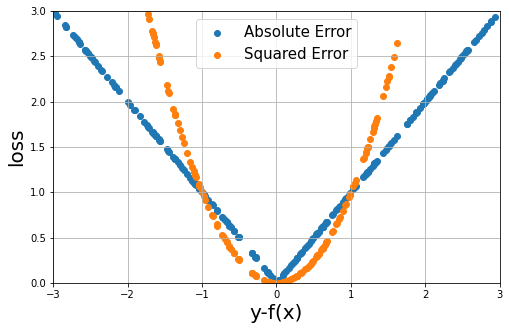

In [ ]:
#-- Slide 5 in Module 2

n = 1000
sd = 2
x = sim_x(n)
y = sim_y(x, sd)

# cross-validation-related code which we will cover later in the course
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 321)

# simple linear regression model
SLR_model = LinearRegression()
SLR_model.fit(x_train, y_train)

y_hat = SLR_model.predict(x_test) # y_hat from our model, f(x)

y_y_hat = y_test - y_hat
square_error_loss = y_y_hat**2
absolute_error_loss = abs(y_y_hat)

# plot
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

plt.scatter(y_y_hat, absolute_error_loss, label='Absolute Error')
plt.scatter(y_y_hat, square_error_loss, label='Squared Error')

plt.xlabel('y-f(x)', size=20)
plt.ylabel('loss', size=20)

plt.grid()
plt.xlim([-3, 3])
plt.ylim([0,3])
plt.legend(loc=0, fontsize=15)

In [ ]:
#-- slide 6
y_test;    # this is the test value of Y
x_test;    # this is the test value of X
SLR_model; # this is our model, f_hat

y_hat = SLR_model.predict(x_test) # this is the f_hat(X)

square_error_loss = y_y_hat**2    # this is L(Y, f_hat(x)) for squared error

R = np.mean(square_error_loss)    # this is a risk for using the simple regression model
print(R)

8.035264111839833


In [ ]:
#-- slide 11
random.seed(321)
n = 100
sd = 2
x_train = sim_x(n)
y_train = sim_y(x_train, sd)

random.seed(418) # should use a different random seed
ntest = 50000
x_test = sim_x(ntest)
y_test = sim_y(x_test, sd)

degree_list = np.concatenate([np.arange(1,9,1), np.arange(10,22,2)])
MSE_train_poly     = np.zeros((len(degree_list),3))
MSE_test_poly      = np.zeros((len(degree_list),3))

for i, d in enumerate(degree_list):
    poly = make_pipeline(PolynomialFeatures(d), LinearRegression())
    poly.fit(x_train,y_train)
    
    tpred_train = poly.predict(x_train)
    tpred_test  = poly.predict(x_test)
    
    MSE_train_poly[i,0] = d
    MSE_train_poly[i,1] = d+1 # edf
    MSE_train_poly[i,2] = np.mean((tpred_train - y_train)**2) # same as mean_squared_error(tpred_train, y_train)

    MSE_test_poly[i,0] = d
    MSE_test_poly[i,1] = d +1 #edf
    MSE_test_poly[i,2] = np.mean((tpred_test - y_test)**2) #same as mean_squared_error(tpred_test, y_test)
    
MSE_result_poly = np.append(MSE_train_poly, MSE_test_poly[:,2:3], axis=1)

k_list = [50,30,25,20,18,15,12,10,8,7,6,5,4,3,2,1]
MSE_train_knn      = np.zeros((len(k_list),3))
MSE_test_knn       = np.zeros((len(k_list),3))

for i, k in enumerate(k_list):
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(x_train,y_train)
    tpred_train = model_knn.predict(x_train)
    tpred_test  = model_knn.predict(x_test)
   
    MSE_train_knn[i,0] = k
    MSE_train_knn[i,1] = n/k # edf
    MSE_train_knn[i,2] = np.mean((tpred_train - y_train)**2) # same as mean_squared_error(tpred_train, y_train)

    MSE_test_knn[i,0] = k
    MSE_test_knn[i,1] = n/k #edf
    MSE_test_knn[i,2] = np.mean((tpred_test - y_test)**2) #same as mean_squared_error(tpred_test, y_test)

MSE_result_knn = np.append(MSE_train_knn, MSE_test_knn[:,2:3], axis=1)


In [ ]:
# --slide 11 (Tables)
df_poly = pd.DataFrame(MSE_result_poly, columns = ['degree','edf','mse.train', 'mse.test'])
df_knn = pd.DataFrame(MSE_result_knn, columns = ['k','edf', 'mse.train', 'mse.test'])
print(df_knn)

       k         edf  mse.train  mse.test
0   50.0    2.000000   5.520797  6.283211
1   30.0    3.333333   3.900125  4.836460
2   25.0    4.000000   3.750588  4.653380
3   20.0    5.000000   3.540851  4.467610
4   18.0    5.555556   3.596398  4.417862
5   15.0    6.666667   3.514817  4.359787
6   12.0    8.333333   3.386219  4.436869
7   10.0   10.000000   3.366854  4.437460
8    8.0   12.500000   3.267256  4.428160
9    7.0   14.285714   3.284591  4.497557
10   6.0   16.666667   3.290091  4.553492
11   5.0   20.000000   3.230611  4.549457
12   4.0   25.000000   2.787564  4.674359
13   3.0   33.333333   2.385247  5.088771
14   2.0   50.000000   1.742483  5.725847
15   1.0  100.000000   0.000000  7.343852


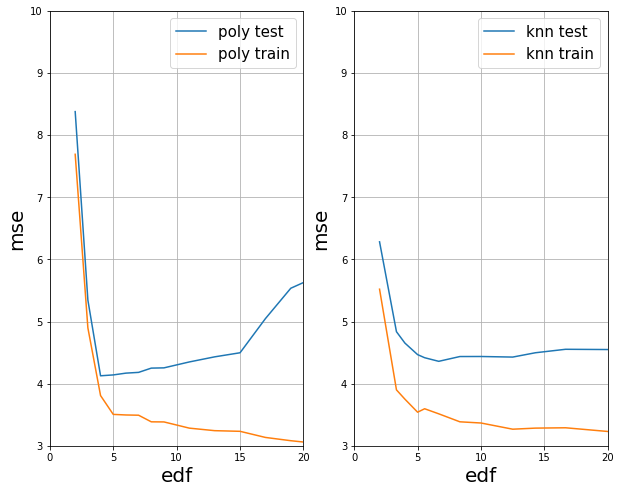

In [ ]:
# --slide 11 (Figure)
fig = plt.gcf()           # fig is the figure's unique handle
fig.set_size_inches(10,8) # define the fig's size in inch

# plot poly test/train mse
plt.subplot(121)          # addind first subplot
plt.plot(df_poly['edf'], df_poly['mse.test'], label='poly test')
plt.plot(df_poly['edf'], df_poly['mse.train'], label='poly train')
plt.xticks(np.arange(0,21,5));

# set the labels and x,y limits
plt.xlabel('edf', size=20)
plt.ylabel('mse', size=20)
plt.xlim([0,20])
plt.ylim([3,10])
plt.grid()
plt.legend(loc="upper right", fontsize=15)

# plot knn test/train mse
plt.subplot(122)          # addind second subplot
plt.plot(df_knn['edf'], df_knn['mse.test'], label='knn test')
plt.plot(df_knn['edf'], df_knn['mse.train'], label='knn train')
plt.xticks(np.arange(0,21,5));

# set the labels and x,y limits
plt.xlabel('edf', size=20)
plt.ylabel('mse', size=20)
plt.xlim([0,20])
plt.ylim([3,10])
plt.grid()
plt.legend(loc="upper right", fontsize=15)

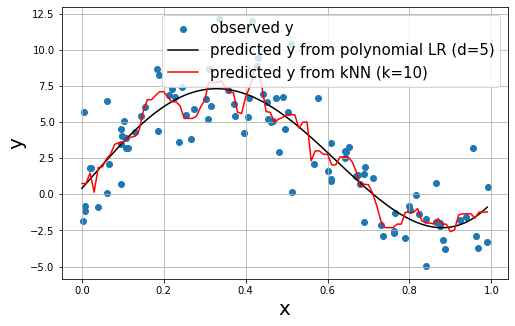

In [ ]:
#-- slide 13
n = 100
degree = 5
k = 5
x = sim_x(n)
y = sim_y(x, sd)

xseq = np.arange(0,1,1/n).reshape(n,1)

poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly.fit(x,y)
y_pred_poly = poly.predict(xseq)

model_knn = KNeighborsRegressor(n_neighbors=k)
model_knn.fit(x,y)
y_pred_knn = model_knn.predict(sorted(xseq))

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x,y, label='observed y')
plt.plot(xseq,y_pred_poly, color='k', label="predicted y from polynomial LR (d=5)")
plt.plot(xseq,y_pred_knn, color='r', label="predicted y from kNN (k=10)")

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add grid and legend
plt.grid()
plt.legend(loc=0, fontsize=15)

In [ ]:
#-- slide 15 (Ensemble prediction)
random.seed(321)
n = 100
sd = 2
x_train = sim_x(n)
y_train = sim_y(x_train, sd)

random.seed(418)
ntest = 50000
x_test = sim_x(ntest)
y_test = sim_y(x_test, sd)

degree_list = [2,3,5,10]
MSE_train_poly     = np.zeros((len(degree_list),3))
MSE_test_poly      = np.zeros((len(degree_list),3))
pred_poly          = np.zeros((ntest,len(degree_list)))

for i, d in enumerate(degree_list):
    poly = make_pipeline(PolynomialFeatures(d), LinearRegression())
    poly.fit(x_train,y_train)
    
    tpred_train = poly.predict(x_train)
    tpred_test  = poly.predict(x_test)
    
    MSE_train_poly[i,0] = d
    MSE_train_poly[i,1] = d+1 # edf
    MSE_train_poly[i,2] = np.mean((tpred_train - y_train)**2) # same as mean_squared_error(tpred_train, y_train)

    MSE_test_poly[i,0] = d
    MSE_test_poly[i,1] = d +1 #edf
    MSE_test_poly[i,2] = np.mean((tpred_test - y_test)**2) #same as mean_squared_error(tpred_test, y_test)
    
    pred_poly[:,i]     = tpred_test.reshape(ntest,)

MSE_result_poly = np.append(MSE_train_poly, MSE_test_poly[:,2:3], axis=1)

k_list = [30,20,15,10]
MSE_train_knn      = np.zeros((len(k_list),3))
MSE_test_knn       = np.zeros((len(k_list),3))
pred_knn           = np.zeros((ntest,len(k_list)))

for i, k in enumerate(k_list):
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(x_train,y_train)
    tpred_train = model_knn.predict(x_train)
    tpred_test  = model_knn.predict(x_test)
   
    MSE_train_knn[i,0] = k
    MSE_train_knn[i,1] = n/k # edf
    MSE_train_knn[i,2] = np.mean((tpred_train - y_train)**2) # same as mean_squared_error(tpred_train, y_train)

    MSE_test_knn[i,0] = k
    MSE_test_knn[i,1] = n/k #edf
    MSE_test_knn[i,2] = np.mean((tpred_test - y_test)**2) #same as mean_squared_error(tpred_test, y_test)

    pred_knn[:,i]     = tpred_test.reshape(ntest,)

MSE_result_knn = np.append(MSE_train_knn, MSE_test_knn[:,2:3], axis=1)


In [ ]:
# --slide 15 (Tables)
df_poly = pd.DataFrame(MSE_result_poly, columns = ['degree','edf','mse.train', 'mse.test'])
df_knn = pd.DataFrame(MSE_result_knn, columns = ['k','edf', 'mse.train', 'mse.test'])
print(df_poly)
print(df_knn)

   degree   edf  mse.train  mse.test
0     2.0   3.0   5.696512  5.748178
1     3.0   4.0   4.557072  4.353955
2     5.0   6.0   4.281001  4.375838
3    10.0  11.0   3.901335  4.804989
      k        edf  mse.train  mse.test
0  30.0   3.333333   4.718894  5.262518
1  20.0   5.000000   4.164251  4.846784
2  15.0   6.666667   4.153583  4.709214
3  10.0  10.000000   3.908634  4.721043


The approach is to create a new ensemble model that is a weighted sum of the individual models.

$f_{w}(x)=\sum_{j=1}^{p} w_{j} f_{j}(x)$

The corresponding test performance is given by:

$R=\frac{1}{M} \sum_{j=1}^{M}\left(y_{j}-\hat{f}_{w}\left(x_{j}\right)\right)^{2}$


In [ ]:
ensemble = np.concatenate((pred_poly, pred_knn), axis=1) # collect predicted data
w = [2/14, 2/14, 5/14, 1/14, 1/14, 1/14, 1/14, 1/14]     # weight (table in the slide 14)
ensemble_pred = np.matmul(ensemble, w) # try to understand this atrix multiplication
                               
en_MSE = mean_squared_error(ensemble_pred, y_test)
print(en_MSE)

4.408161521095843


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12b73f9a-5dd8-43d6-99ee-0bde04bee819' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>